## Support vector machine in Python and practical considerations

In the lecture we have introduced a new machine learning technique, support vector machine. Here is a quick summary of its characteristics. 

- SVM(SVR) can be used for both Classification(binary or more) and Regression problems.
- It is designed as a linear separator but can implement Kernels to achieve non-linear decision boundary line.
- May need to tune the hyper-parameters
- Good for the data with large number of features but large number of observations may still slow it down. 

In this code demostration, we will highlight a couple of things when you apply SVM to real life models, including:

- Fit and evaluate SVM performance (accuracy, precision, recall, F1 score, and mean square error)
- Data preprocessing and feature scaling.
- Hyperparameter tuning and methods for model selection.
- Imbalanced datasets.


#### Example 1: Iris dataset

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
class_labels = [target_names[label] for label in y]

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

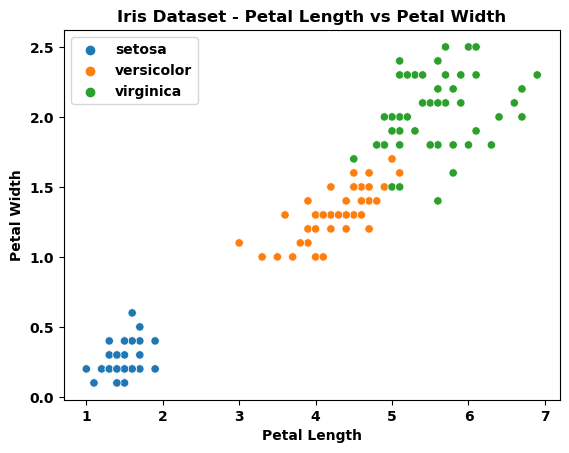

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot using Seaborn
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=class_labels)

# Add labels and legends
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset - Petal Length vs Petal Width')

# Display the plot
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')


# Train the classifier on the training data
svm_classifier.fit(X, y)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X)

# Calculate the accuracy of the classifier
print(accuracy_score(y, y_pred))


0.9933333333333333


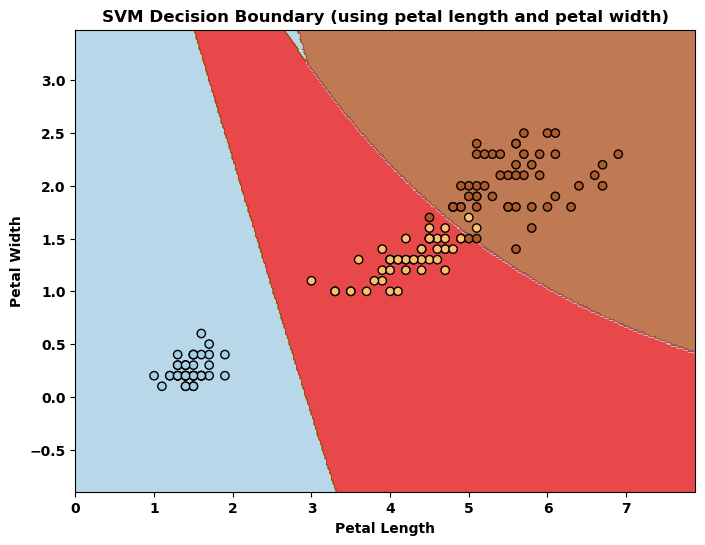

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the features (petal length and petal width)
X = iris.data[:, 2:4]
y = iris.target

# Fit SVM model
svm_model = SVC(kernel='poly')
svm_model.fit(X, y)

# Create a meshgrid of points to make predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the meshgrid
Z = svm_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary (using petal length and petal width)')
plt.show()

#### Example 2: Breast Cancer dataset

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier on the unscaled training data
svm_classifier.fit(X_train, y_train)
y_pred_unscaled = svm_classifier.predict(X_test)
accuracy_unscaled = accuracy_score(y_pred_unscaled, y_test)

# Scale the training and testing data using StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)

# Train the classifier on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)
y_pred_scaled = svm_classifier.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_pred_scaled, y_test)

# Print the accuracies
print(f"Accuracy (unscaled data): {accuracy_unscaled}")
print(f"Accuracy (scaled data): {accuracy_scaled}")

Accuracy (unscaled data): 0.956140350877193
Accuracy (scaled data): 0.9824561403508771


#### Example 3: Breast Cancer data with parameter tuning

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['scaled', 'auto']
}

# Perform grid search cross-validation
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Train the classifier on the best hyperparameters
best_classifier = SVC(**best_params)
best_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_classifier.predict(X_test_scaled)

# Calculate accuracy
print(accuracy_score(y_test, y_pred))

# Print the best hyperparameters and accuracy



{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.9736842105263158


C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\h

Note: The gamma parameter can have a significant impact on the SVM model's flexibility and generalization ability. It determines how far the influence of a single training example extends, effectively shaping the decision boundary. Here's what the gamma parameter represents:

Small Gamma (Low Value):
- A small gamma value leads to a larger radius of influence for each support vector.
- The decision boundary becomes smoother and more linear.
- The model is less complex and less prone to overfitting.

Large Gamma (High Value):
- A large gamma value restricts the radius of influence for each support vector.
- The decision boundary becomes more irregular and wiggly, allowing the model to capture intricate patterns in the training data.
- The model becomes more complex and more prone to overfitting.

The appropriate choice for the gamma parameter depends on the specific dataset and the complexity of the underlying relationships. Tuning the gamma parameter is an important aspect of hyperparameter optimization in SVM. It is often performed using techniques like grid search or random search to find the best combination of hyperparameters for a given problem.

Besides of the numerical input, you can also have two setting for the gamma parameters: 

"scale":
- With gamma="scale", the gamma value is determined based on the inverse of the feature variance scaled by the number of features (1 / (n_features * X.var())).
- This setting scales the gamma value based on the input features, taking into account the variance of the features.
- It is a popular choice as it adapts the gamma value to the data automatically, making it suitable for datasets with different scales and variances.

"auto":

- With gamma="auto", the gamma value is set to the inverse of the number of features (1 / n_features).
- This setting uses a fixed gamma value irrespective of the input data.
- It is a simpler approach and can be suitable when the scale or variance of the features is not a significant factor in the problem.

#### Example 4: Imbalanced data

Imbalanced data can have a significant impact on the fitting of Support Vector Machines (SVM) classifiers. SVMs aim to find a decision boundary that maximally separates different classes, but the presence of imbalanced data can introduce challenges. Here are a few ways in which imbalanced data can affect SVM fitting:

- Biased Decision Boundary: SVMs are influenced by support vectors, which are the data points near the decision boundary. In imbalanced datasets, the minority class may have fewer instances and, as a result, fewer support vectors. This can lead to a biased decision boundary that favors the majority class, potentially misclassifying instances from the minority class.
- Accuracy and Generalization Issues: When data is imbalanced, the SVM model may prioritize the majority class due to its larger representation. As a result, the model may achieve high accuracy on the majority class but struggle with correctly classifying instances from the minority class. This can lead to lower overall accuracy and reduced generalization performance on new, unseen data.
- Sensitivity to Outliers: Outliers or misclassified instances in the minority class can have a stronger impact on the SVM fitting in imbalanced datasets. Since SVMs aim to maximize the margin, outliers or misclassified minority class instances can exert a disproportional influence on the decision boundary, potentially leading to poor performance.
- Class Imbalance Metrics: Traditional accuracy alone may not be an informative metric when dealing with imbalanced data. Additional evaluation metrics like precision, recall, F1-score, and area under the Receiver Operating Characteristic (ROC) curve may be more appropriate for assessing the SVM's performance on both the majority and minority classes.

To address the impact of imbalanced data on SVM fitting, several techniques can be employed, including:

- Resampling methods: Oversampling the minority class (e.g., using techniques like SMOTE) or undersampling the majority class can help rebalance the dataset.
- Class weights: Assigning higher weights to the minority class during SVM training can help balance the impact of different classes on the decision boundary.
- Cost-sensitive learning: Adjusting the misclassification costs for different classes to account for the class imbalance can help improve SVM performance.
- Anomaly detection: Identifying outliers or misclassified instances in the minority class and handling them separately can mitigate their influence on the SVM fitting.

These techniques can help mitigate the negative impact of class imbalance and improve the SVM's performance on imbalanced datasets. The choice of the most suitable approach depends on the specific characteristics of the dataset and the goals of the classification task.

In [12]:
import pandas as pd
df_summary = pd.DataFrame({'Class': y})
print(df_summary.value_counts())

Class
1        357
0        212
Name: count, dtype: int64


In [15]:
from imblearn.over_sampling import SMOTE

# Perform oversampling using SMOTE
oversampler = SMOTE(random_state=4400)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Fit the SVM classifier on the resampled training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9210526315789473


#### Example 5: Regression: diabetes dataset

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}

# Create an SVR regressor
svm_regressor = SVR()

# Perform grid search cross-validation
svm_grid = GridSearchCV(svm_regressor, param_grid, cv=5)
svm_grid.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = svm_grid.best_params_
print(best_params)

# Train the regressor on the best hyperparameters
best_regressor = SVR(**best_params)
best_regressor.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_regressor.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(mse)

{'C': 1, 'kernel': 'linear'}
2520.64442117407


### SVM with Gradient Descent

In [20]:
import numpy as np

class LinearSVM:
    
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.beta = None
        self.beta0 = None
            
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y1 = np.where(y <= 0, -1, 1)
        
        self.beta = np.zeros(n_features)
        self.beta0 = 0
        
        for _ in range(self.num_epochs):
            for i in range(n_samples):
                if y1[i] * (np.dot(X, self.beta) + self.beta0) >= 0:
                    self.beta -= self.learning_rate * (2 * self.beta)
                else:
                    self.beta0  -= -self.learning_rate * y1[i]
                    self.beta -= self.learning_rate * (2 * self.beta - np.dot(X[i,:], y1[i])) 
                
    def predict(self, X):
        return np.sign(np.dot(X, self.beta) + self.beta0)

In [ ]:
# make_classification